# Laptop Price Predictor 

In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read the dataset 

df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price(2019),Price in dollar(2019),Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,1019.695474,86674.11531
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,684.221760,58158.84960
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,437.657143,37200.85714
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,1931.361943,164165.76510
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,1372.797257,116687.76690


### Note:-
This dataset is 5 years old, which is why it does not include Apple's M1, M2, or M3 processors.
The Price (2019) column represents prices from five years ago.

First, I converted the price into USD using the exchange rate from that year (1 USD = 70 INR). 
Then, I converted the USD amount back into INR using today's exchange rate.

In [3]:
# rows and columns in dataset

df.shape

(1303, 14)

In [4]:
# checking for datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1303 non-null   int64  
 1   Company                 1303 non-null   object 
 2   TypeName                1303 non-null   object 
 3   Inches                  1303 non-null   float64
 4   ScreenResolution        1303 non-null   object 
 5   Cpu                     1303 non-null   object 
 6   Ram                     1303 non-null   object 
 7   Memory                  1303 non-null   object 
 8   Gpu                     1303 non-null   object 
 9   OpSys                   1303 non-null   object 
 10  Weight                  1303 non-null   object 
 11  Price(2019)             1303 non-null   float64
 12  Price in dollar(2019)   1303 non-null   float64
 13  Price                   1303 non-null   float64
dtypes: float64(4), int64(1), object(9)
memor

In [5]:
# drop price in euro column 

df.drop(columns=["Price(2019)","Price in dollar(2019) "],axis=1,inplace=True)

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
# remove GB from Ram and Kg from Weight for data preprocessing 

df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690


In [9]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [10]:
# check for duplicate values

df.duplicated().sum()

29

In [11]:
# check for missing values

df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [12]:
df.rename(columns=lambda x: x.strip(), inplace=True) #to remove unnecessary gap between columns name

In [13]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

## EDA 

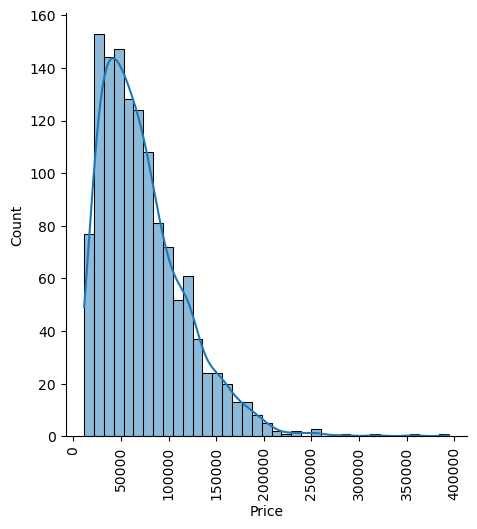

In [14]:
sns.displot(df['Price'],kde=True)
plt.xticks(rotation='vertical')
plt.show()



### Observation

1. Data is right skewed 
2. Less price laptop are more avilable in market as compare to higher price laptop

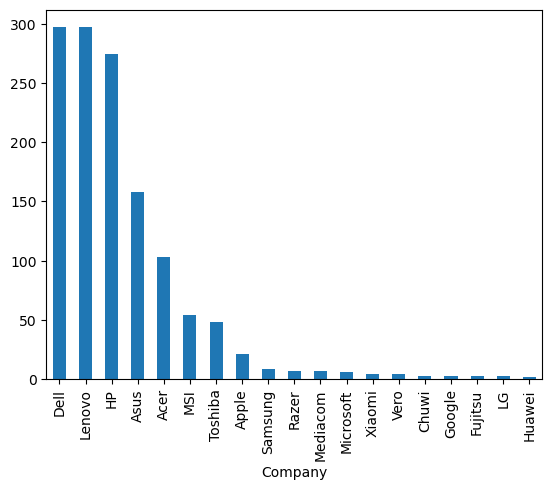

In [15]:
# check for dominating company in market

df['Company'].value_counts().plot(kind='bar')
plt.show()

### Observation

1. Dell and Lenovo are the dominant player of market  
2. After Dell and Lenovo, HP is the third largest player of market 

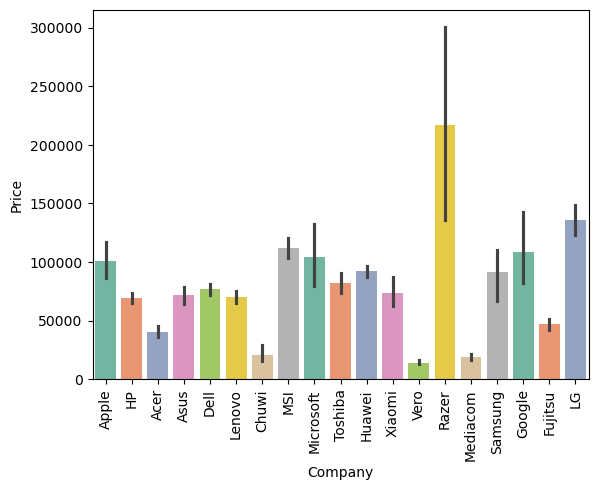

In [16]:
# check price range for every company's laptop

sns.barplot(x=df['Company'],y=df['Price'],palette ='Set2')
plt.xticks(rotation='vertical')
plt.show()

### Observation

1. Razer laptops are much more expensive compared to those from other companies
2. LG is the second expensive laptop company


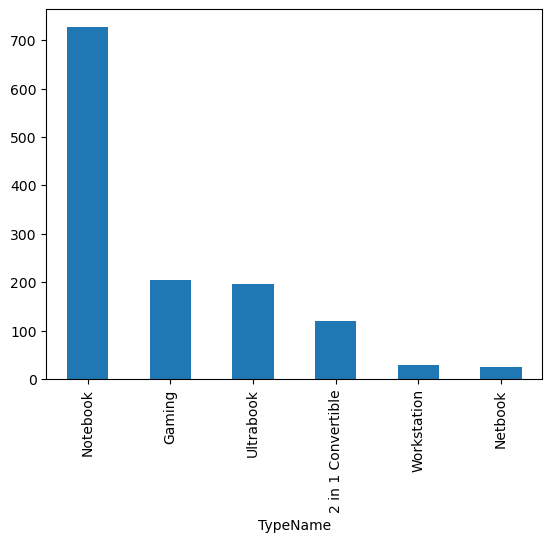

In [17]:
# check for type of laptops 

df['TypeName'].value_counts().plot(kind='bar')
plt.show()

### Observation

1. Notebook type laptop is the most selling laptop
2. It is budget friendly laptop for students

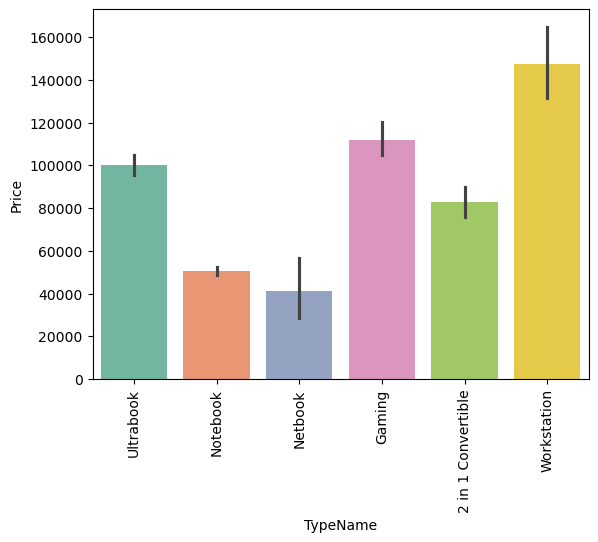

In [18]:
# check price range for every type laptop 

sns.barplot(x=df['TypeName'],y=df['Price'],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

### Observation 

1. Workstation is the costly laptop type
2. Gaming is the second most costly laptop type

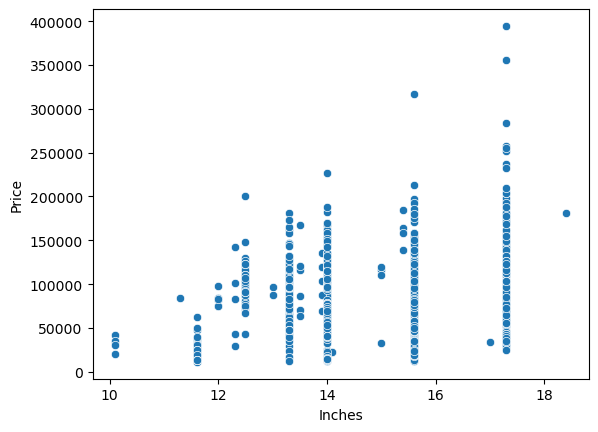

In [19]:
# check size impact on price 

sns.scatterplot(x= df['Inches'],y=df['Price'])
plt.show()

### Observation

1. There is a correlation between size and prices but nither strong or nither weak
2. As size increases to maximum then it will impact on price
3. Most of the laptops are vary in similar ranges 

In [20]:
# check for ScreenResolution value counts

df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [21]:
# Making different column for touchscreen laptops

df['Touchscreen']= df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0


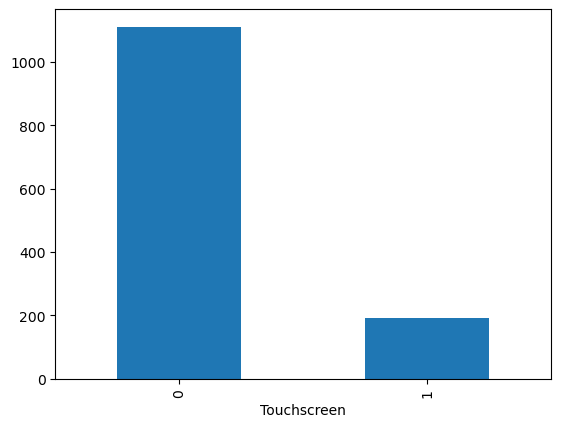

In [23]:
# plot value counts for touchscreen laptops

df['Touchscreen'].value_counts().plot(kind='bar')
plt.show()

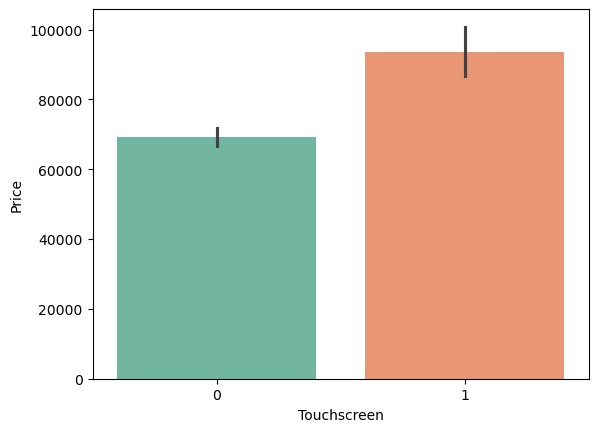

In [24]:
sns.barplot(x=df['Touchscreen'],y=df['Price'],palette='Set2')
plt.show()

### Observation

1. Touchscreen laptops are less in market as per the value counts
2. As compare to without touchscreen laptop , touchscreen laptops are more costlier 

In [25]:
# create different column for IPS laptop

df['IPS']= df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1


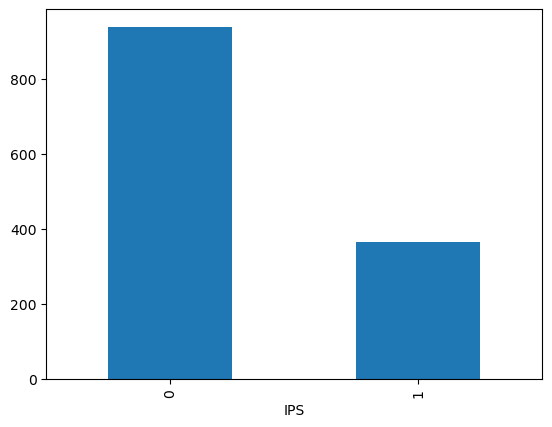

In [27]:
# plot value counts for IPS laptops

df['IPS'].value_counts().plot(kind='bar')
plt.show()

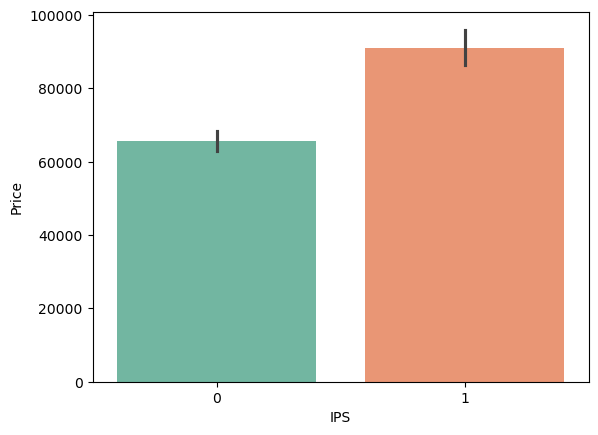

In [28]:
sns.barplot(x=df['IPS'],y=df['Price'],palette='Set2')
plt.show()

### Observation

1. IPS laptops are most costly as compare to NON-IPS laptops 

In [29]:
# splitting screen resolution column 

new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [30]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1,IPS Panel Retina Display 2560,1600


In [32]:
# extracting the only resolution value from X_res

df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [33]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1,2560,1600


In [34]:
# converting X_res and Y_res data types to int

df['X_res']= df['X_res'].astype('int64')
df['Y_res']= df['Y_res'].astype('int64')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [36]:
# checking correlation of numerical column with price

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()['Price']
print(corr_matrix)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


In [37]:
# Creating new column PPI (Pixel per inches) (More PPI, More Costly laptop) 

df['PPI']=((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']

### Note

PPI is a measure of screen sharpness or clarity. A higher PPI means the screen has more pixels
packed into each inch, leading to sharper images and text.

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1,2560,1600,226.983005


In [39]:
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()['Price']
print(corr_matrix)

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64


In [40]:
# Droping Screenresolution,inches,X_res,Y_res

df.drop(['ScreenResolution','Inches','X_res','Y_res'],axis=1,inplace=True)

In [41]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1,226.983005


In [42]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [43]:
# Extracting cpu name from cpu column

df['Cpu Name']= df['Cpu'].apply(lambda x:" ".join(x.split()[0:3])) #Pull out name from list

In [44]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1,226.983005,Intel Core i5


In [45]:
# define a function to print out cpu name

def fetch_processor (text):
    if text== 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    if text.split()[0]== 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    

In [46]:
df['Cpu brand']= df['Cpu Name'].apply(fetch_processor)

In [47]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1,226.983005,Intel Core i5,Intel Core i5


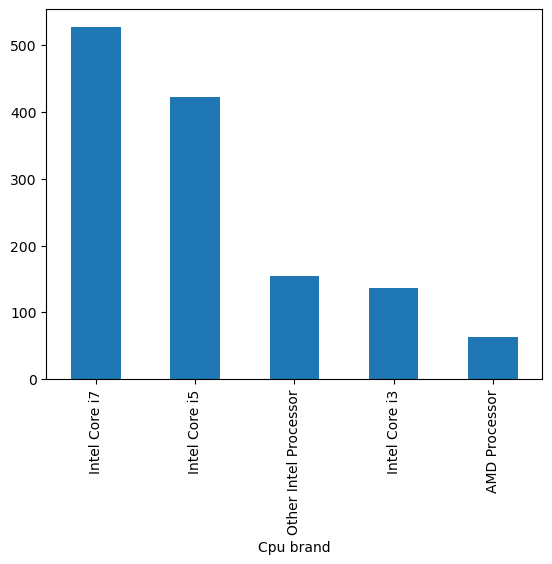

In [48]:
df['Cpu brand'].value_counts().plot(kind='bar')
plt.show()

### Observation

1. Intel core i7 is the most preferable Cpu brand 

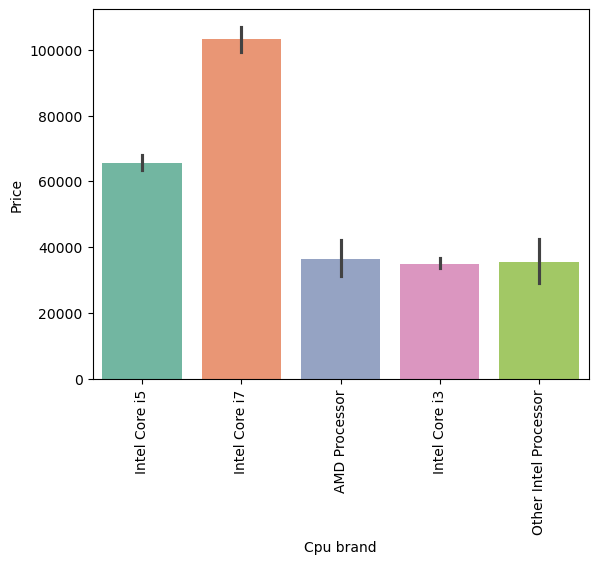

In [49]:
# Check for average price for cpu brand

sns.barplot(x=df['Cpu brand'],y=df['Price'],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

### Observation

1. Intel core i7 average price starts from 80,000
2. AMD Processor , Intel core i3 and other Intel Processor price are same 

In [50]:
# Dropping columns Cpu and Cpu name

df.drop(['Cpu','Cpu Name'],axis=1,inplace=True)

In [51]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1,226.983005,Intel Core i5


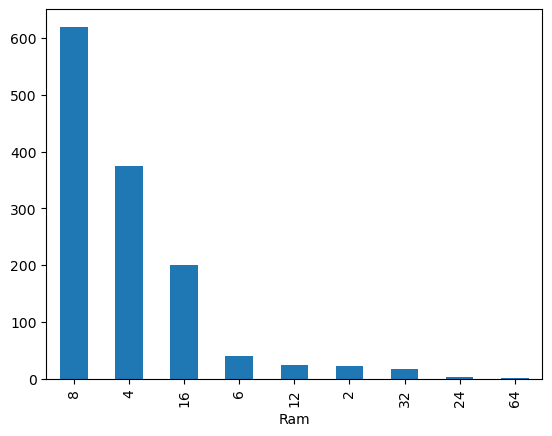

In [52]:
# analysis on Ram column

df['Ram'].value_counts().plot(kind='bar')
plt.show()

### Observation

1. 8 GB ram laptop sell highest in the market
2. 4 GB ram laptop is the second highest seller in the market,
which shows more consumer goes for buuget friendly laptops.

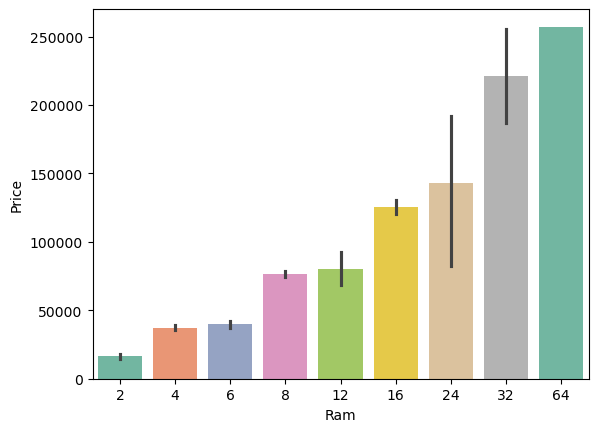

In [53]:
sns.barplot(x=df['Ram'],y=df['Price'],palette='Set2')
plt.show()

### Obseravtion

1. There is a strong relationship between ram and prices
2. As ram increases , price also increases 

In [54]:
# feature engeneering on memory column

df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

### Note-
We are going to create four different columns for SSD, HDD, Hybrid and Flash

1. If a laptop has an SSD, the other three columns (HDD and Hybrid) will be 0.
2. If a laptop has an HDD, the other three columns (SSD and Hybrid) will be 0.
3. If a laptop has an SSD + HDD, the other two columns (Flash and Hybrid) will be 0.

In [55]:
# Clean the 'Memory' column
df['Memory'] = df['Memory'].astype(str).replace(r'\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '', regex=False).str.replace('TB', '000', regex=False)


In [56]:
# Split into two parts (if there's a "+" sign)
df[['first', 'second']] = df['Memory'].str.split('+', n=1, expand=True).fillna("0").applymap(str.strip)

In [57]:
# Function to extract storage type and size
def extract_storage(storage_str, storage_type):
    return int(''.join(filter(str.isdigit, storage_str))) if storage_type in storage_str else 0


In [58]:
# Apply function to extract values
df["HDD"] = df["first"].apply(lambda x: extract_storage(x, "HDD")) + df["second"].apply(lambda x: extract_storage(x, "HDD"))
df["SSD"] = df["first"].apply(lambda x: extract_storage(x, "SSD")) + df["second"].apply(lambda x: extract_storage(x, "SSD"))
df["Hybrid"] = df["first"].apply(lambda x: extract_storage(x, "Hybrid")) + df["second"].apply(lambda x: extract_storage(x, "Hybrid"))
df["Flash_Storage"] = df["first"].apply(lambda x: extract_storage(x, "Flash Storage")) + df["second"].apply(lambda x: extract_storage(x, "Flash Storage"))


In [59]:
# Drop unnecessary columns

df.drop(['first','second','Memory'],axis=1,inplace=True)

In [60]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1,226.983005,Intel Core i5,0,256,0,0


In [61]:
# checking for correlation between price and HDD,SSD,Hybrid & Flash_storage

df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()['Price']
print(corr_matrix)

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


### Observation

1. Price has a negative correlation with HDD, it means the more price leads to less HDD
2. Price has a good correlation with SSD
3. Hybrid and Flash_storage have no relation with price so we will drop these 2 columns for further modeling 

In [62]:
# drop the columns Hybrid and Flash_storage

df.drop(['Hybrid','Flash_Storage'],axis=1,inplace=True)

In [63]:
df.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,127.677940,Intel Core i5,0,0


In [64]:
## Feature engeneering on GPU column (Graphical processing unit)

df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

### Note:-
Here, we have the names of graphic card companies rather than the specifications like 4GB, 8GB, or 16GB. 
Since the full name is not useful for further preprocessing, we are extracting only the company name.

In [65]:
# extracting company's name

df['Gpu brand']= df['Gpu'].apply(lambda x:x.split()[0])

In [66]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,86674.11531,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,58158.84960,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,37200.85714,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,164165.76510,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,116687.76690,0,1,226.983005,Intel Core i5,0,256,Intel


In [67]:
# dropping Gpu column

df.drop(['Gpu'],axis=1,inplace=True)

In [68]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,86674.11531,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,58158.84960,0,0,127.677940,Intel Core i5,0,0,Intel


In [69]:
# check for the value counts of Gpu brand

df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [70]:
# Ignoring the ARM Gpu because of solo value

df = df[df['Gpu brand'] != 'ARM']

In [71]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

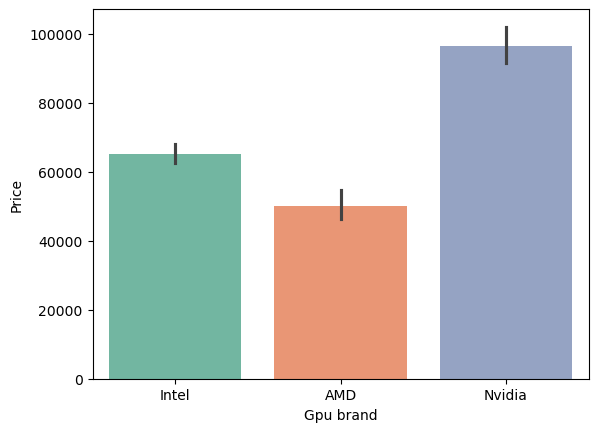

In [72]:
# check for the price value of each Gpu brand

sns.barplot(x=df['Gpu brand'],y=df['Price'],palette= 'Set2')
plt.show()

### Observation

1. Nvidia is the most expensive GPU brand.
2. Surprisingly, Intel GPUs are the second most expensive, compared to AMD.

In [73]:
df.head(2)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,86674.11531,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,58158.84960,0,0,127.677940,Intel Core i5,0,0,Intel


In [74]:
# feature engeneering on opreationg system column (Opsys)

df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

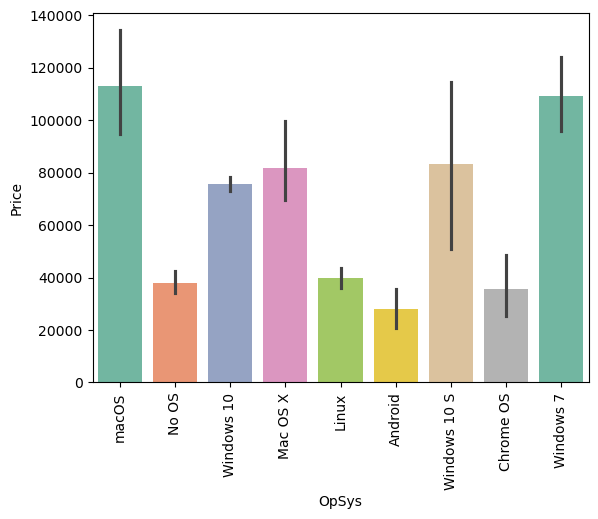

In [75]:
sns.barplot(x=df['OpSys'],y=df['Price'],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

### Observation

1. Here we have 3 different category (windows,macOS and other)
2. As compare with price macOS and windows are the dominating players in the market 

In [76]:
# creating function 

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

This function categorizes:
1. Windows laptops :- "Windows"
2. MacBooks :- "Mac"
3. Others (Linux, No OS, etc.) :- "Others/No OS/Linux"

In [77]:
df['os'] = df['OpSys'].apply(cat_os)

In [78]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,86674.11531,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,58158.84960,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,37200.85714,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,164165.76510,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,116687.76690,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [79]:
# dropping Opsys 

df.drop(['OpSys'],axis=1,inplace=True)

In [80]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,86674.11531,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


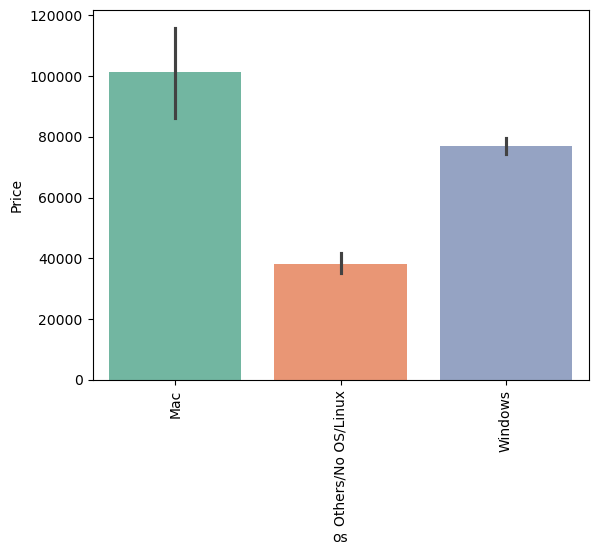

In [81]:
sns.barplot(x=df['os'],y=df['Price'],palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

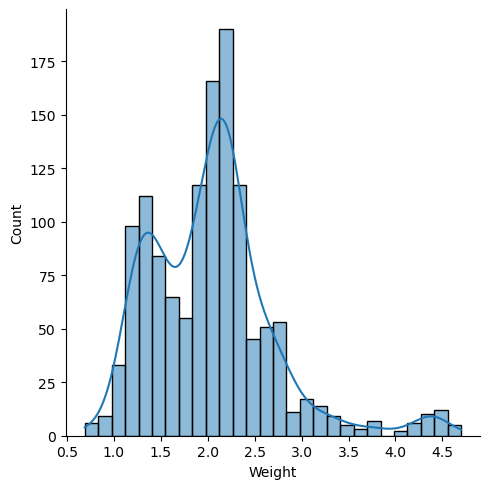

In [82]:
sns.displot(df["Weight"], kde=True)
plt.show()

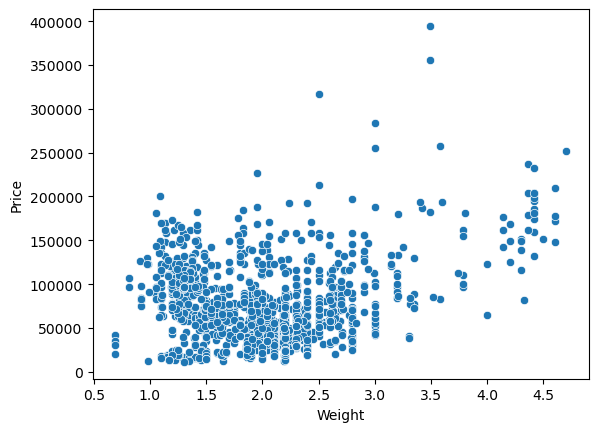

In [83]:
sns.scatterplot(df,x='Weight',y='Price')
plt.show()

### Observation

There is a weak correlation between price and weight 

In [84]:
df_numeric = df.select_dtypes(include=np.number)
df_corr = df_numeric.corr()['Price']
print(df_corr)

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64


In [85]:
# check for the correlation for all numeric features

df_numeric = df.select_dtypes(include=np.number)
df_corr = df_numeric.corr()

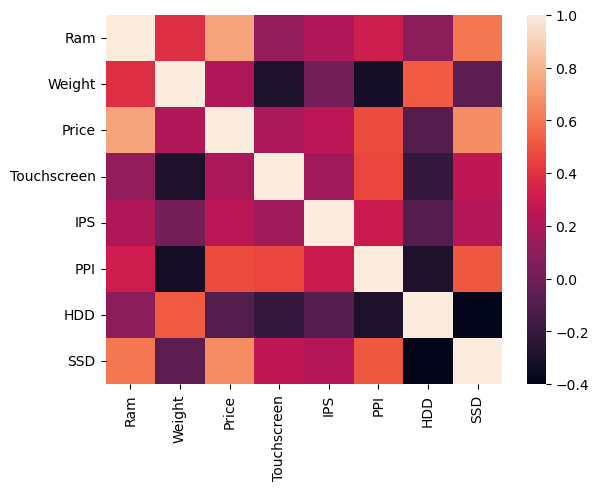

In [86]:
sns.heatmap(df_corr)
plt.show()

C:\Users\Dells\AppData\Local\Temp\ipykernel_9200\911078060.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']),kde=True)


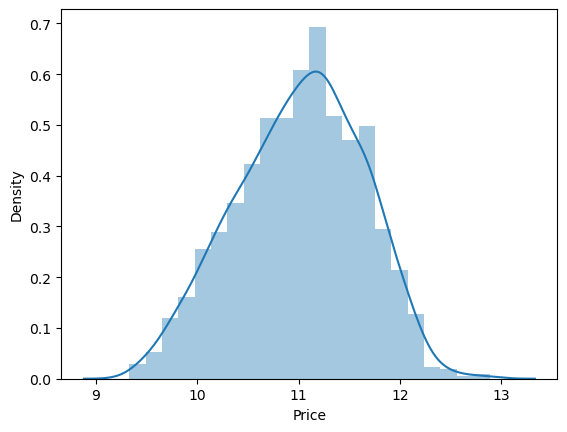

In [87]:
# converting skewed price column to log price

sns.distplot(np.log(df['Price']),kde=True)
plt.show()

## Modelling 

In [88]:
# divinding our dataset into x and y 

X = df.drop(columns =['Price'])
y = np.log(df['Price'])

In [89]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [90]:
y.head()

0    11.369911
1    10.970933
2    10.524087
3    12.008632
4    11.667257
Name: Price, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [92]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


Now we have to handle all categorical variable for model building 
so here we are using ColumnTransformer and pipline algorithm 

In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [94]:
# importing neccesarry libraries for model building 

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear regression

In [95]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,86674.11531,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


In [96]:
step1=ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))      

R2 score 0.8073277448175185
MSE 0.2101782797864666


## Ridge regression

In [97]:
step1= ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))      

R2 score 0.8127331031064614
MSE 0.20926802244160897


## Lasso regression

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= Lasso(alpha=0.001)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.8071853945092579
MSE 0.21114361615042365


## KNN

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe= Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.8009101720403335
MSE 0.1941340839655575


## Decision Tree

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.8483547168609326
MSE 0.1782161621969353


## SVM

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= SVR(kernel='rbf',C=10000,epsilon=0.2)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.8117252245941102
MSE 0.20331189259482751


## Random forest

In [111]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= RandomForestRegressor(n_estimators=100,
                             max_depth=15,
                             random_state=4,
                             max_samples=0.7,
                             max_features=0.75
                            )
                         
                     
                         

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.8907626492488944
MSE 0.15580892856249626


## Extra Trees

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= ExtraTreesRegressor(n_estimators=100,
                             max_depth=15,
                             random_state=3,
                             max_samples=0.6,
                             max_features=0.75,
                           bootstrap=True)
                         
                     
                         

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.8874968963844153
MSE 0.1583875841014263


## Adaboost

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= AdaBoostRegressor(n_estimators=14,learning_rate=1.0)
                     
                         

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.7883785111660422
MSE 0.23263352929994774


## Gradient boost

In [105]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= GradientBoostingRegressor(n_estimators=500)
                     
                         

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.8837619878783304
MSE 0.1589106821256515


## Xgboost

In [106]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2= XGBRegressor(n_estimators=16, learning_rate=0.6, max_depth=5)
                     
                         

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.8891816812022557
MSE 0.1578011796838681


## Voting Regressor 

In [107]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

In [108]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=4, max_samples=0.7, max_features=0.75)
et = ExtraTreesRegressor(n_estimators=100, max_depth=15, random_state=3, max_samples=0.6, max_features=0.75, bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=500)
xg =  XGBRegressor(n_estimators=16, learning_rate=0.6, max_depth=5)


step2= VotingRegressor([('rf',rf),('et',et),('gbdt',gbdt),('xg',xg)])
                     
                         

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.897959501333188
MSE 0.14855085137189977


## Stacking regressor

In [109]:
step1 = ColumnTransformer(transformers=[
    ('col_trans',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators=[('rf' , RandomForestRegressor(n_estimators=100, max_depth=15, random_state=4, max_samples=0.7, max_features=0.75)),
('gbdt', GradientBoostingRegressor(n_estimators=500)),
('xg' ,  XGBRegressor(n_estimators=16, learning_rate=0.6, max_depth=5))]


step2= StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=100))
                     
                         

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2_score',r2_score(y_test,y_pred))
print('MSE',mean_absolute_error(y_test,y_pred))

R2_score 0.8903069802428164
MSE 0.15471829892476188


### Exporting the model

In [114]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
print("df.pkl saved successfully")

pickle.dump(pipe, open('pipe.pkl', 'wb'))
print("pipe.pkl saved successfully")

df.pkl saved successfully
pipe.pkl saved successfully
